<a href="https://colab.research.google.com/github/mrhamedani/Deep-learning-projects-Tensorflow/blob/main/2_breast_cancer_Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [ ]:
df= pd.read_csv('breast-cancer.csv') # The dataset is used to diagnose malignant or benign cancer
df = df.drop('id', axis=1)
# df.isnull().sum() # We did not have null data
df

In [9]:
df['diagnosis']= df['diagnosis'].map({'M':1,'B':0})
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [20]:
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.25, random_state=0) # 75% train
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0) # 10% val & 10% test

# Should we use Scaling or Normalization?
- Scaling is usually better if you use ReLU in a neural network.
- Normalization is better if the data is normally distributed or if you use Sigmoid/Tanh.
- If you have a lot of outliers, Normalization is more robust.


In [22]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) # fit & transform the training data
x_test = scaler.transform(x_test) # do not fit the test data
x_val = scaler.transform(x_val)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
model =tf.keras.models.Sequential([tf.keras.layers.Dense(30, activation='relu'),
                                    tf.keras.layers.Dense(60, activation='relu'),
                                   tf.keras.layers.Dense(120, activation='relu'),
                                   tf.keras.layers.Dense(60, activation='relu'),
                                   tf.keras.layers.Dense(30, activation='relu'),
                                   tf.keras.layers.Dense(1, activation='sigmoid')]) # sigmoid for binary classification -last layer

model.compile(optimizer='adam', loss='binary_crossentropy', # binary_crossentropy for binary classification(0 or 1)
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),   # adam optimizer is used to update the weights(better than GDP)
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))

In [24]:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(x_test, y_test)
print(f"\n🔹 Test Accuracy: {test_accuracy:.4f}")
print(f"🔹 Test Precision: {test_precision:.4f}")
print(f"🔹 Test Recall: {test_recall:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9783 - loss: 0.0645 - precision: 0.9731 - recall: 0.9731

🔹 Test Accuracy: 0.9722
🔹 Test Precision: 0.9655
🔹 Test Recall: 0.9655


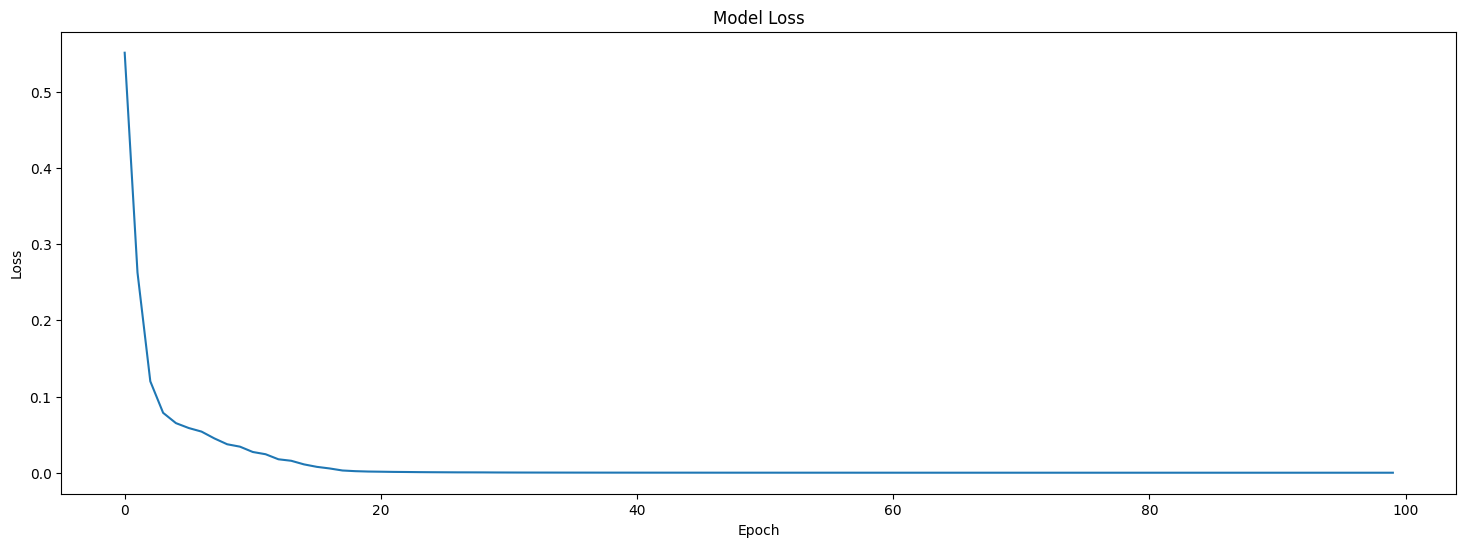

In [25]:
plt.figure(figsize=(18,6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()